# 1. 군집화란?

우리는 데이터 분석을 진행하면서 예측 대상에 대한 가상의 군집을 설정해야 할 때가 종종 있다.  
고객 분류 데이터를 예시로 들면, 백화점 데이터의 경우 각 백화점의 고객 분류 기준에 따라 vip, gold, silver 등등으로 구분할 수 있다. 하지만, 타겟에 대한 분류 명확한 기준이 없는 데이터의 경우에는 어떡할까?  

이때 우리는 __`군집화(Clustergin)`__ 을 통해 군집을 분류한다.  

__`군집화`__ 란 비지도학습의 대표적인 기술로 x에 대한 레이블이 지정되어 있지 않은 데이터를 그룹핑하는 분석 알고리즘이다. 데이터들의 특성을 고려해 데이터 집단(클러스터)을 정의하고, 데이터 집단를 대표할 수 있는 중심점(평균점)을 찾는 것으로 설명할 수 있다.  

여기서 `클러스터`란 비슷한 특성을 가진 데이터의 집단으로 하나의 그룹이라고 생각하면 된다. 반대로 데이터의 특성이 다르다면, 다른 클러스터에 속해야 한다.  

위의 고객 분류 데이터의 경우, 비슷한 행동을 하는 고객을 동일한 클러스터로 분류하는 고객 분류, 동일한 클러스터 내의 고객들이 좋아하는 컨텐츠를 추천하는 추천시스템, 제시된 이미지와 비슷한 이미지를 찾아주는 검색 엔진, 차원 축소를 이용하여 분석을 위한 충분한 정보를 가질 수 있다. 또한, 이상치를 탐지할 수도 있다. 만약 레이블 된 샘플이 적다면, 군집화를 이용하여 클러스터를 만들고 동일한 클러스터에 있는 모든 샘플을 동일한 레이블을 부여하여 지도 학습의 성능을 높일 수 있다.   

그렇다면 군집화는 어떻게 구현될까?  

* __`비계층적 군집화`__ : 사전에 군집의 수를 정해주는 방법 / 중심기반과 밀도기반으로 나뉜다.(KMeans, DBSCAN)  


* __`계층적 군집화`__ : 각 개체가 독립적인 각각의 군집에서 점차 거리가 가가운 대상과 군집을 이루는 방법

# 2. KMeans

__`KMeans`__ 는 군집화(Clustering)에서 가장 대표적으로 사용되는 알고리즘이다.  

군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법으로 각 cluster 내 유사도는 높이고 외 유사도는 낮추는 것을 가정으로 각 cluster 거리 차이의 분산을 최대화 하는 것이 목적이다. 
간단히 얘기하면 각 군집간의 거리를 최대한 벌려 명확한 군집들로 나뉘고자 하는 알고리즘이다.  
군집 중심점(centroid)은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점 평균 지점으로 이동하는 프로세스를 반복한다.  



## 1) KMeans 클러스터링 과정

### 1] 데이터 준비

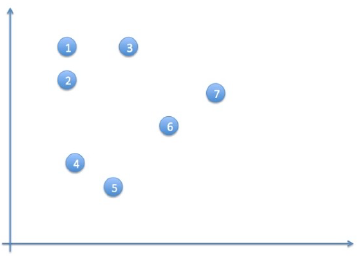

__`KMeans`__ 알고리즘은 데이터 간의 거리를 사용해 클러스터를 나누기 때문에, 거리 계산을 위해 수치화된 데이터가 필요하다.  

클러스터링은 __비지도학습__에 해당되기 때문에, 지도학습 분류 알고리즘과는 달리, 데이터 준비 단계에서는 데이터에 특정 라벨이나 특정 색이 부여되지 않았음을 확인할 수 있다.

### 2] 클러스터 개수(k) 결정

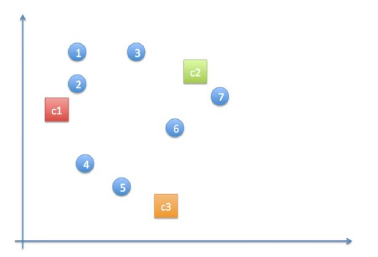

__k__ : 1단계에서 준비한 데이터를 총 몇 개(k)의 클래스로 군집화할 것인지 결정  

__< 군집 개수 결정 방법 >__  

* __`Hierarchical Clustering`__ : bottom-up 방식으로 모두 계층화 한다.  



* __`Rule of Thumb(경험 법칙)`__ : 데이터의 수가 $n$ 이라고 할 때, 필요한 클러스터의 수 $k \approx \sqrt{n / 2}$


* __`Elbow Method`__ : 클러스터 수를 순차적으로 늘려가면서 결과를 본다. 하나를 추가했을 때 이전의 결과보다 좋지 못하면 이전의 클러스터의 수로 결정한다. GridSearch와 비슷하다고 생각하면 된다.


* __`Information Criterion Approach(정보 기준 접근법)`__ : 클러스터링 모델이 대해 likelihood(조건부확률)을 점수로 계산한다. KMeans의 경우에 __Gaussian Mixture model__을 활용해 likelihood를 계산한다.  

만약 특정한 데이터가 두 개의 군집 중심간의 거리가 각각 동일하다면 알고리즘 자체에서 기준을 하나 설정해서 하나의 군집으로 선택한다. 기준이란 예를 들어 '앞의 순서를 먼저 선택한다거나 랜덤샘플링을 통해 선택한다 등' 이다.

### 3] 클러스터의 최초 중심 설정

K개의 초기 중심점(Centroid)을 설정하는 단계이다.  

KMeans 알고리즘은 초기 중심점으로 어떤 값을 선택하는가에 따라 성능이 크게 달라지는 성질을 가진다. 따라서 초기 중심값을 잘 설정해야하며, 다음과 같은 몇가지 방법들이 있다.  

__< 중심점 설정 방법 >__  

* __`무작위 설정`__ : KMeans 표준 알고리즘에 따라 클러스터의 최초 중심을 무작위로 설정한다. 이는 초기 중심이 한 군데로 집약되는 경우 군집화하는 데 시간이 오래걸리며, 군집화 결과가 좋지 않을 수 있다는 단점이 존재한다.  


* __`사용자가 직접 설정`__ : 사용자가 데이터에 대한 정보를 바탕으로 직접 최초 중심을 설정한다. ex) 지역별 위도/경도 데이터 , LA/NY/SF 대표 지역 선정  


* __`KMeans++ 알고리즘`__ : 최초 데이터 포인터를 첫번째 클러스터의 중심으로, 최초 데이터에서 가장 먼 데이터를 두번째 클러스터의 중심으로, 기존 클러스터 중심에서 가장 먼 데이터를 세번째 클러스터의 중심으로 선정 하는 방법으로 선정한다.  
표준 KMeans 알고리즘의 랜덤 중심 설정으로 보완이 가능하다.

### 4] 데이터를 가장 가까운 클러스터로 설정

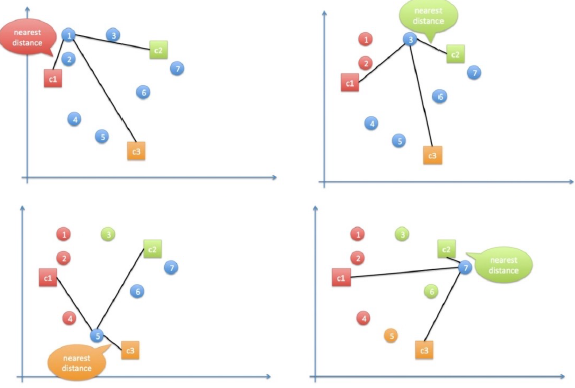

__KMeans 클러스터링의 목표__ 는 $\sum^N_{n=1}\sum^K_{k=1} r_{nk} \vert x_n - \mu_k \vert^2$ 의 최소화이다.  

* $x_n$ : 데이터 포인트의 값  

* $\mu_k$ : 현재 최초 중심  

* $r_{nk}$ : 소속 클러스터  

$x_n$와 $\mu_k$은 고정되어 있으므로 $r_{nk}$를 조정하여 목적함수를 최소화한다.  

즉, 각 데이터를 가장 가까운 클러스터에 배정하여 데이터와 중심값의 거리를 최소화하고자 한다.

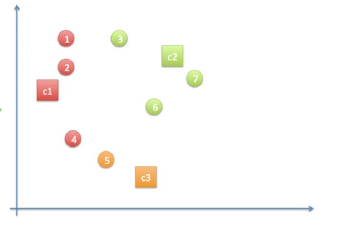

### 5] 클러스터 중심을 클러스터 내부 데이터의 가운데 위치로 변경

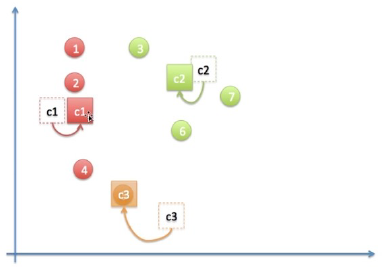

이 과정에선 위의 목적함수에서 최초 중심이 아닌, 목적함수를 최소화 시키려는 $\mu_k$를 구하고자 한다.  

목적함수를 $\mu_k$에 대해 미분하면, 다음과 같은 식이 도출된다.  

$$ \mu_k = \frac{\sum_nr_{nk}x_n}{\sum_nr_{nk}} = \frac{\text{k번째 클러스터에 속한 x의 벡터합}}{\text{k번째에 속한 x의 개수}}$$  

따라서, $\mu_k$는 k번째 클러스터에 속한 데이터의 산술평균이므로 클러스터의 중심값을 데이터들의 가운데 위치로 변경하여 목적함수를 최소화하고자 한다.

### 6] 위의 과정을 4~5번 반복

1-5번의 과정을 4-5번 반복하여 최종 클러스터를 결정한다.  

각 클러스터에 속한 데이터가 변경되지 않을때 까지  
클러스터의 중심이 변경되지 않을 때까지  
사용자가 직접 설정한 최대 반복 횟수까지

## 2) KMeans의 장단점

__< 장점 >__  

* 군집화 기법 중 가장 많이 활용되는 클러스터링 기법이다.  

* 알고리즘이 단순하며, 빠르게 수행되어 분석 방법 적용이 용이하다.  

* 계측정 군집분석에 비해 많은 양의 데이터를 다룰 수 있다.  

* 내부 구조에 대한 사전정보가 없어도 의미있는 자료구조를 찾을 수 있다.  

__< 단점 >__  

* 피쳐가 많을 경우 클러스터링의 정확도가 떨어진다.  

* 반복횟수가 많을 경우 수행 시간이 매우 길어질 수 있다.  

* 노이즈값이나 이상치의 영향을 많이 받는다.  

* 초기 군집수 결정에 어려움이 있다.  

* 초기 중심 위치에 따라 군집화 결과가 달라질 수 있다.  

* 볼록한 형태가 아닌 군집이 존재할 경우에는 오히려 성능이 저하된다.  

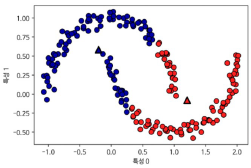

## 3) Kmeans 실습

__< KMeans의 주요 파라미터 >__  

* __`n_clusters`__ : 군집(클러스터)의 개수 : K  


* __`init`__ : 클러스터의 최초 중심 설정 방법  
> `random` : 무작위 -> 표준 KMeans 알고리즘  
> `n_clutsers` * `n_features` 의 shape를 가진 array : 사용자 직접 설정  
> `k-means++` : k-means++ 알고리즘(default)  

* __`n_init`__ : 최초 중심 위치 시도 횟수(default = 10) -> n_init번의 시도 중 가장 좋은 위치로 최종 결정. 일반적으로 k-means++ 방식으로 최초에 설정  


* __`max_iter`__ : 클러스터링 최대 반봇 횟수(defalut = 300) -> 4~5번 과정이 반복되는 횟수. 설정한 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


1, 2 타겟이 그룹핑이 잘 되지 않았다.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


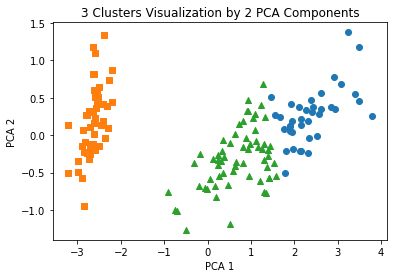

In [6]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 4) Clustering 테스트를 위한 데이터 생성

사이킷런은 다양한 유형의 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다. 대표적인 군집화용 데이터 생성기로는 `make_blobs()`와 `make_classification()` API가 있다.  
두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.  

* __`make_blobs()`__ : 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있다.  


* __`make_classification()`__ : 노이즈를 포함한 데이터를 만드는데 유용하다.  

`make_blobs()`를 사용해서 평가 데이터를 만들어보자.  

__< `make_blobs()` 파라미터 >__  

* __`n_samples`__ : 생성할 총 데이터의 개수. defalut = 100  

* __`n_features`__ : 데이터 feature의 개수. 시각화를 목표로 할 경우 보통 2로 설정  

* __`centers`__ : int 값 -> 만들어낼 군집의 개수 / ndarray 형태 -> 개별 군집 중심점의 좌표  

* __`cluster_std`__ : 생성될 군집 데이터의 표준 편차. 즉, 퍼져있는 정도

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


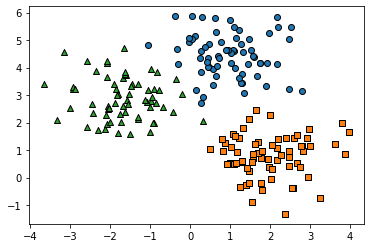

In [12]:
target_list = np.unique(y)

# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

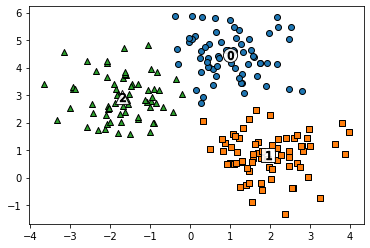

In [13]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [14]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


# 3. 군집 평가(Cluster Evaluation)

앞의 iris 데이터의 경우 타겟값이 있었고, 군집화 결과를 해당 레이블과 비교해 군집화가 얼마나 잘되었는지 확인할 수 있었다.  

하지만, 군집화는 비지도학습이기 때문에 군집화가 잘 되었는지 비교할 만한 타겟 레이블을 가지고 있지 않는 경우가 대부분이다. 또한 군집화는 분류와 유사해보일 수 있으나 성격이 많이 다르다. 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.  

따라서 비지도학습의 특성 상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 불구하고 군집화의 성능을 확인할 수 있는 평가지표가 존재한다.  

바로 `실루엣계수(silhouette coefficient)`이다.

## 1) 실루엣 계수(silhouette coefficient)

군집화 평가 방법으로 `실루엣 분석(silhouette anaylsis)`이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 효율적으로 잘 분리되었다는 것은 다른 군집과의 거리는 떨어져 있고, 군집 내 데이터끼리는 서로 가깝게 잘 뭉쳐 있다는 것을 의미한다.  

군집화가 잘 될수록 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.

__`실루엣 계수`__는 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며, 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분이 되는지 클러스트링을 평가하는 척도로 활용된다.  

실루엣 계수는 -1에서 1사이의 값을 가지며, 1로 가까워질수록 근처 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다.  

(-) 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.  

0의 값은 데이터들이 겹쳐있음을 뜻한다.

### 1] 실루엣 계수 구하는 방법

$i$ 번째 데이터 포인트의 실루엣 계수 값 $s(i)$ 는 다음과 같이 정의한다.

$$ s(i) = \frac{(b(i) - a(i))}{max(a(i),b(i))}$$

* $a(i)$ : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값  


* $b(i)$ : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리  


* $(b(i) - a(i))$ : 두 군집 간의 떨어져 있는 거리의 값  


* $ max(a(i), b(i))$ : $s(i)$의 분자값을 정규화하기 위한 값

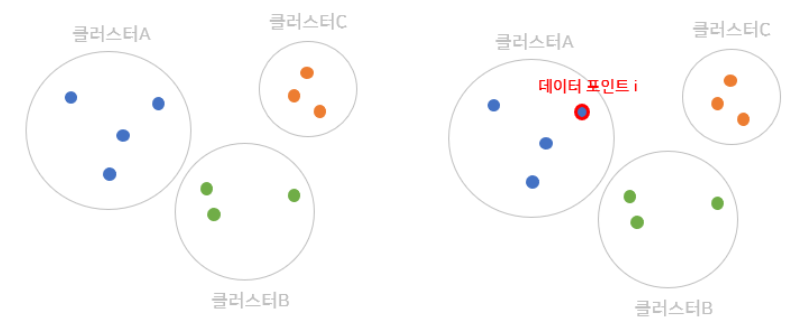

다음과 같은 클러스터가 있다고 하자. 우리는 데이터 포인트 i의 실루엣 계수를 구하고자 한다.  

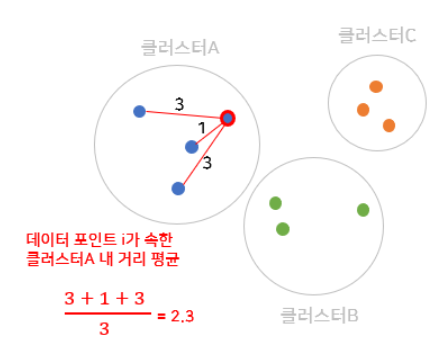

먼저 선택한 데이터 i에 대해 같은 군집에 있는 데이터들 끼리의 거리의 평균을 구해준다. 이는 $a(i)$가 된다.  

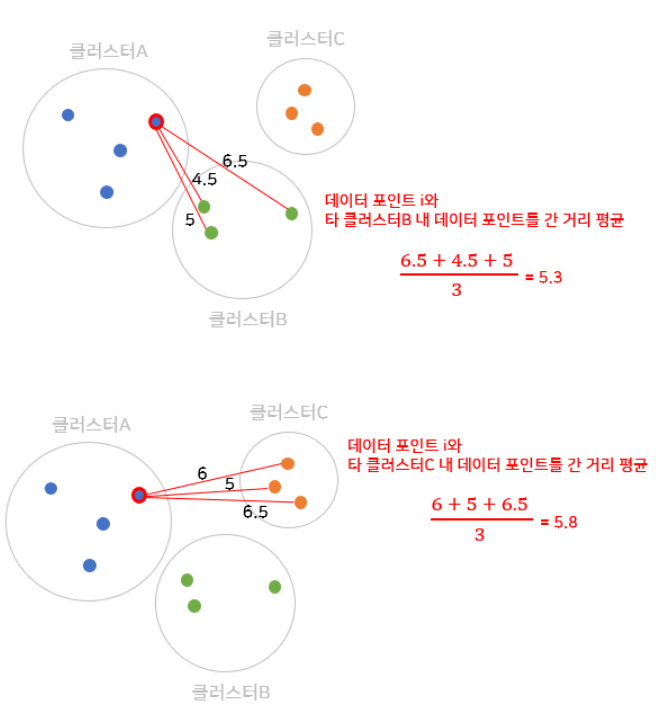

다른 군집에 있는 데이터 포인트들간의 거리의 평균을 구해준다.  

여기서 클러스터A와 가까운 군집은 클러스터B 이므로 B와의 거리의 평균이 $b(i)$가 된다.  

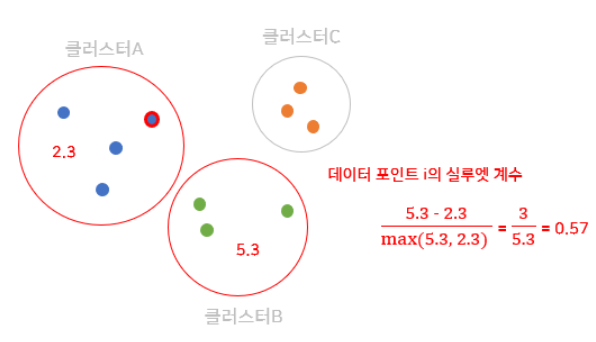

따라서 클러스터 A의 i 데이터와 클러스터B와의 실루엣 계수는 0.57이 된다.  

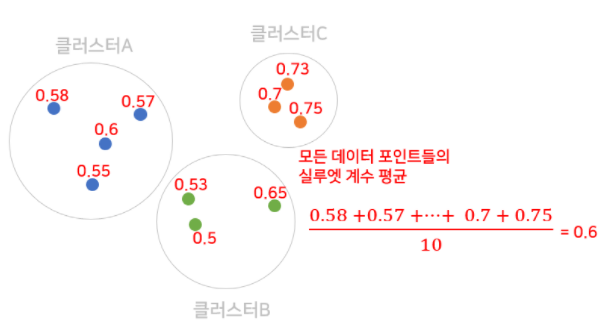

위 그림처럼 모든 데이터 포인트들에 대해 실루엣 계수를 계산했다면, 실루엣 계수들의 평균값(overall average silhouette width)을 계산해준다. 만일 클러스터 개수별로 여러 번 군집화를 수행했거나, 여러 클러스터링 기법으로 여러 번 군집화를 수행한 경우 실루엣 계수의 평균값을 비교하여, 클러스터 개수를 몇 개로 할 것인지, 혹은 어떤 클러스터 기법을 선택할 것인지 판단할 수 있다. 

* 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있다.  


* 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있다. 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현된다.  


* 실루엣 계수 계산식의 분모는 두 군집 간 거리를 정규화하는 스케일러의 역할을 한다. 


* 동일한 클러스터 내에 있더라도 데이터 포인트마다 이웃 클러스터는 다를 수 있다. 


* 만일 클러스터 안에 1개의 데이터 포인트만 존재하는 경우, 해당 데이터 포인트의 실루엣 계수는 0으로 본다. 

### 2] 실루엣 분석의 장단점

__< 장점 >__  

* 클러스터링이 수행된 후 실제 구분된 클러스터에 따라 실루엣 계수를 구하기 때문에, 클러스터링 알고리즘에 영향을 받지 않는다.  


* 적절한 클러스터 계수를 정하거나 더 나은 클러스터링 기법을 선택하는 기준으로 삼을 수 있다.  


* 클러스터링 결과값을 시각화할 수 있다.  

__< 단점 >__  

* 데이터 양이 많아질수록 수행 시간이 오래 걸린다.  
만일 100개의 데이터 포인트가 있다면 99개의 다른 데이터 포인트들과 거리를 구해 실루엣 계수를 구해야 되고, 이런 동일 연산을 100번 수행해야 하기 때문에 시간이 오래 걸림.  


* 전체 데이터 포인트의 실루엣 계수 평균값만으로 클러스터링 결과를 판단할 수 없으며 개별 클러스터의 평균값도 함께 고려해야 한다.  


실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 유난히 낮으면 좋은 군집화 조건이 아니다.  

좋은 군집화는 1에 가까운 실루엣 계수 값을 가진다.  
하지만, 높은 실루엣 계수 값이 나왔다고 해서 항상 잘 된 군집화를 의미하지는 않는다.  

따라서 만들어진 군집을 시각화한 자료와 실루엣 계수를 동시에 고려해서 적절한 군집 수를 결정해야 한다. 

### 3] 실루엣 계수 실습

사이킷런은 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.

* __`sklearn.metrics.silhouette_samples(X, labels, metric = 'euclidean', **kwds)`__ : X feature 데이터 세트와 각 피쳐 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.  


* __`sklearn.metrics.silhouette_score(X, labels, metric = 'euclidean', sample_size = None, *kwds)`__ : 전체 데이터의 실루엣 계수의 평균값을 구해준다.

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [17]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

#### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

앞서 설명한바와 같이 전체 데이터의 평균 실루엣 계수가 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수값만 너무 높고, 다른 군집은 내투 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 KMeans의 적절한 군집 개수가 설정됐다고 판단할 수 있다.  

사이킷런에는 이러한 방법을 시각적으로 지원해주는 패키지가 있다.

In [22]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

* K = 2

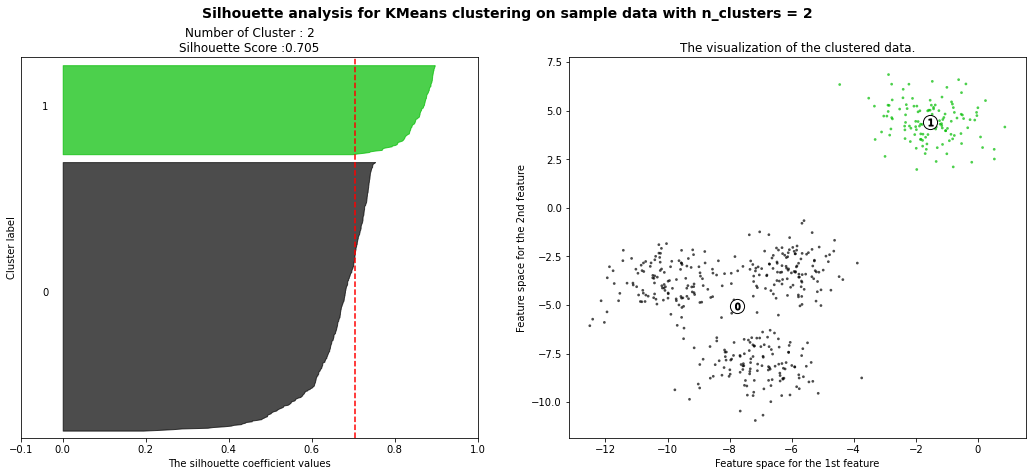

In [23]:
# 가상데이터: 피처 2개, 클러스터 4개
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# K-Means K: 2
visualize_silhouette_sklearn([2], X)

2개의 클러스터로 나눈 경우의 실루엣 계수와 군집화 결과를 시각화하였다.  

평균 실루엣 계수는 0.705로 꽤 높게 나타났다. 하지만, 이렇게 2개로 군집화 하는 것이 최적의 방법일까? 에 대한 질문에는 '그렇지 않다'라고 답하고 싶다.  

왼쪽 그림으로 판단해 볼 때 1번 labels에 대한 군집의 모든 데이터는 평균 실루엣 계수 이상이지만, 0번 labels에 대한 군집의 데이터는 평균 실루엣 계수 이하의 값을 가지기도 한다.  

오른쪽 그림의 산점도를 보자. 실제로 1번 군집은 어느정도 잘 뭉쳐져 있음을 알 수 있지만, 0번 군집은 군집 내 데이터들이 잘 뭉쳐있지 않음을 알 수 있다.

* K = 3

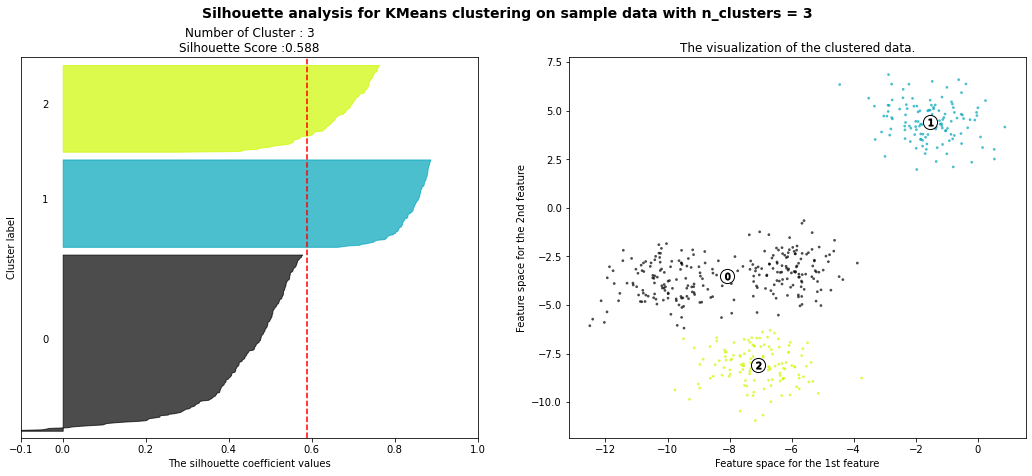

In [24]:
# K-Means K: 3
visualize_siblhouette_sklearn([3], X)

3개의 클러스터로 나눈 경우이다.  

전체 데이터의 평균 실루엣 계수는 0.588로 그렇게 높지 않은 값을 가진다.  
눈여겨 볼 점은 1번 군집에 대한 실루엣 계수는 평균값을 뛰어넘지만 0,2번 군집에 대한 실루엣 계수 평균값은 그렇지 않다.  

실제로 오른쪽 산점도를 보아도 그 결과의 이유를 알 수 있다.  
특히 0번 군집의 경우 확연히 차이가 난다.

* K = 4

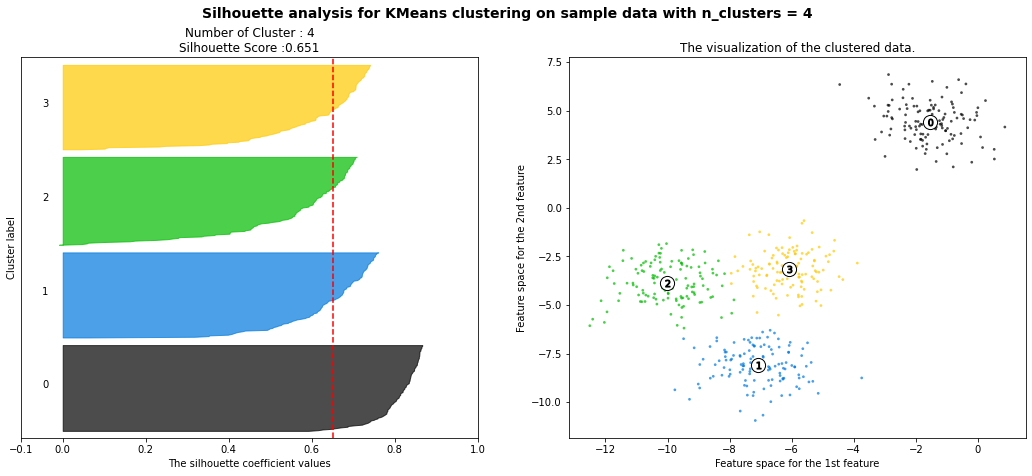

In [25]:
# K-Means K: 4
visualize_silhouette_sklearn([4], X)

4개의 클러스터로 나눈 경우이다.  

평균 실루엣 계수는 0.651이다.  

왼쪽 그림에서 보듯이 개별 군집의 평균 실루엣 계수가 어느정도 전체 군집의 평균 실루엣 계수를 균일하게 넘고있다.  

오른쪽 그림의 산점도를 보아도 어느정도 군집간의 거리도 벌어져 있으며, 군집 내의 데이터들간의 분포 또한 적당하다고 볼 수 있다.  

따라서 2,3,4개의 군집 중 4개의 군집으로 나누는 것이 가장 합리적이라고 판단할 수 있다.

In [26]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

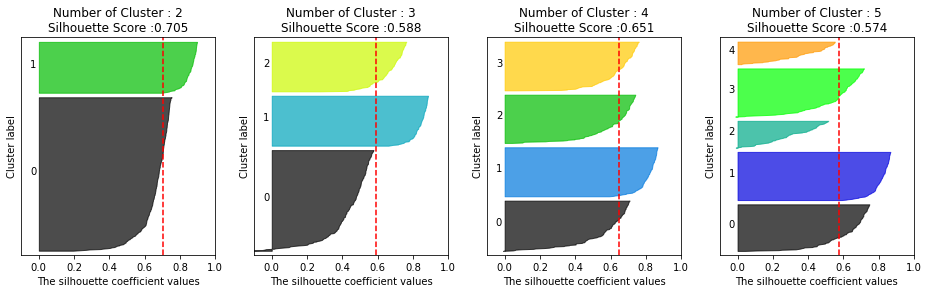

In [27]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

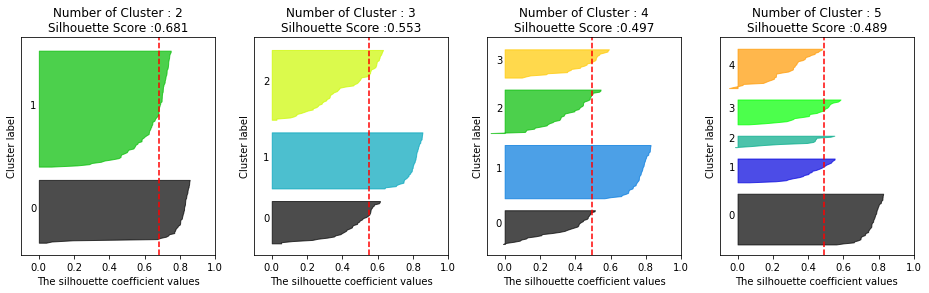

In [28]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

실루엣 계수를 통한 KMeans 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 따라서 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안도 고려해서 군집화를 진행해야 효율적이다.

# 4. 평균 이동(Mean Shift)